# Analysis 1


In [44]:
import json
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import mplfinance as mpf

Load file


In [45]:
with open('../data-dump/account-candles-XAU_USD-D.json', 'r', encoding='UTF8') as in_file:
    json_data = json.load(in_file)


In [46]:
instrument = json_data['instrument']
granularity = json_data['granularity']
candles = json_data['candles']

print(f"Instrument: [ {instrument} ], Granularity: [ {granularity} ]")


Instrument: [ XAU_USD ], Granularity: [ D ]


In [47]:
flatten_data = [
    [ 
        datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
        bool(x['complete']), 
        int(x['volume']), 
        float(x['mid']['o']), 
        float(x['mid']['h']), 
        float(x['mid']['l']), 
        float(x['mid']['c'])
    ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time','complete', 'Volume', 'Open', 'High', 'Low', 'Close'])

print(f"df shape: {df.shape}")

# print(df.info())

df shape: (500, 7)


In [48]:
df['ma'] = df['Close'].rolling(20).mean()
df['ewm'] = df['Close'].ewm(span=20, adjust=False).mean()
# df.head(30)

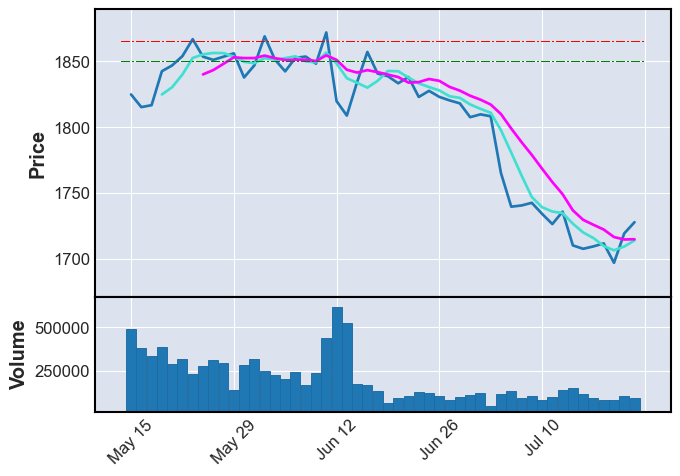

In [49]:
# https://github.com/matplotlib/mplfinance
dfx = df.tail(50).set_index('time')
mpf.plot(dfx, type='line', 
    mav=(4, 8),
    hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    volume=True)

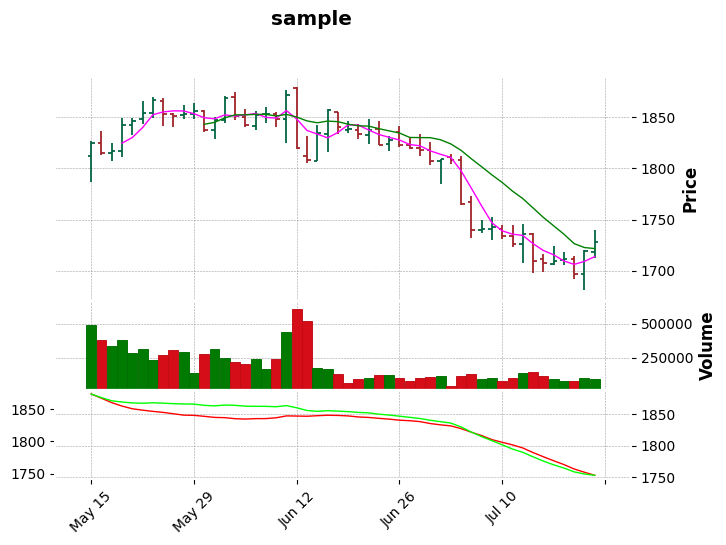

In [50]:
ap0 = [ 
    mpf.make_addplot(dfx['ma'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

#  mpf.available_styles()


mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(
    base_mpf_style='charles',
    mavcolors=['fuchsia','g','r'],
    #mavcolors=['#1f77b4','#ff7f0e','#2ca02c'],
    #marketcolors=mc
    )

mpf.plot(dfx, type='ohlc',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

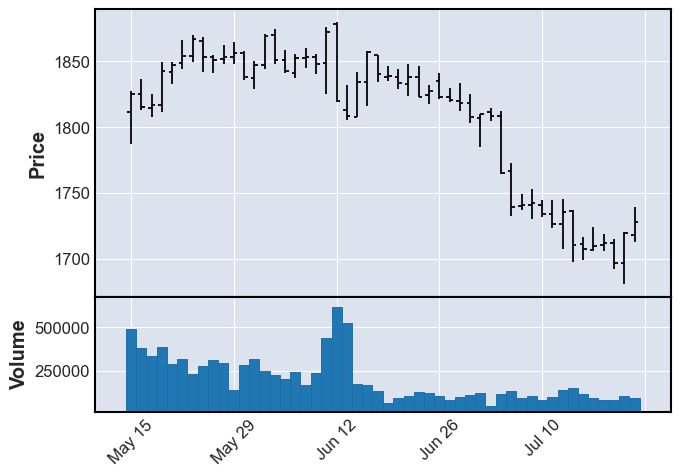

In [51]:
mpf.plot(dfx,volume=True)


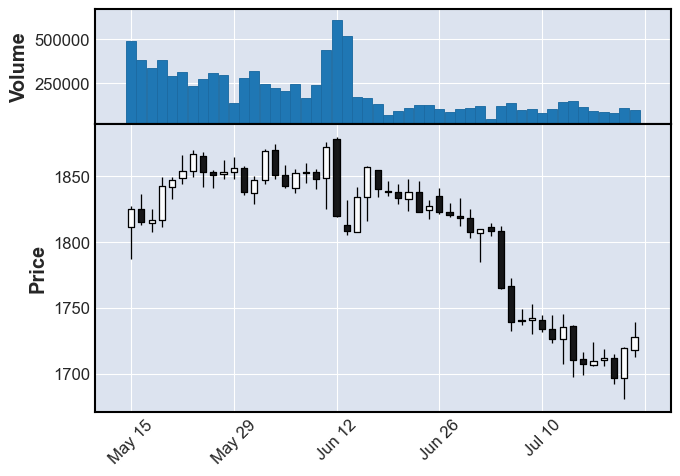

In [52]:
mpf.plot(dfx,type='candle',volume=True,main_panel=1,volume_panel=0)